## Plot Fisher constraints

This notebook plots the output from the Fisher example "cosmodc2_firecrown_real_fisher.yaml"

In [4]:
import numpy as np
import pylab as mplot
from numpy.linalg import inv
%pylab inline
import matplotlib
from matplotlib.patches import Ellipse
mplot.rc('font', family='serif')
import os

def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]

def get_ellipse(fisher):
    
    inv_fisher = np.zeros((2,2))
    inv_fisher[0,0] = inv(fisher)[0,0]
    inv_fisher[0,1] = inv(fisher)[0,1]
    inv_fisher[1,0] = inv(fisher)[1,0]
    inv_fisher[1,1] = inv(fisher)[1,1]
    print(inv_fisher)
    fisher_red = inv(inv_fisher)
    smallC = inv(fisher_red)

    vals, vecs = eigsorted(smallC)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    print(vals, theta)
    
    return vals, theta

def plot_ellipse(vals, theta, color, label, nsigma, lw, ls):
    
    for i in range(nsigma):
        width, height = 2 * (i+1) * np.sqrt(vals)
        if i==(nsigma-1):
            ellip = Ellipse(xy=[0.22,0.8], width=width, height=height, angle=theta, facecolor='none', label=label, edgecolor=color, lw=lw, ls=ls)
        else:
            ellip = Ellipse(xy=[0.22,0.8], width=width, height=height, angle=theta, facecolor='none', edgecolor=color, lw=lw, ls=ls)
            
        mplot.gca().add_patch(ellip)
    
    return

Populating the interactive namespace from numpy and matplotlib


In [5]:
cosmodc2_fisher_firecrown = np.loadtxt('fisher.txt')

[[ 0.00105488 -0.00164151]
 [-0.00164151  0.00260881]]
[3.64795288e-03 1.57405015e-05] 122.33537566561438


Text(0, 0.5, 'sigma8')

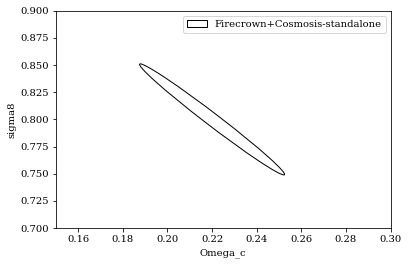

In [6]:
vals, theta = get_ellipse(cosmodc2_fisher_firecrown)
plot_ellipse(vals, theta, 'k', 'Firecrown+Cosmosis-standalone', 1, 1, '-')

mplot.legend()
mplot.xlim(0.15,0.3)
mplot.ylim(0.7,0.9)
mplot.xlabel('Omega_c')
mplot.ylabel('sigma8')